In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import initdirs

In [2]:
import cv2
import math
import multiprocessing as mp
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd
import os

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes import pipeline
from epypes import compgraph

from visiongraph import calib as calibgraph
from visionfuncs.io import open_image, sorted_glob
from visionfuncs import cbcalib

In [4]:
imfiles = sorted_glob(os.path.join(initdirs.DATA_DIR, 'opencv_cb_left/*.jpg'))
images = [open_image(f, cv2.IMREAD_GRAYSCALE) for f in imfiles]
psize = (9, 6)
sq_size = 10

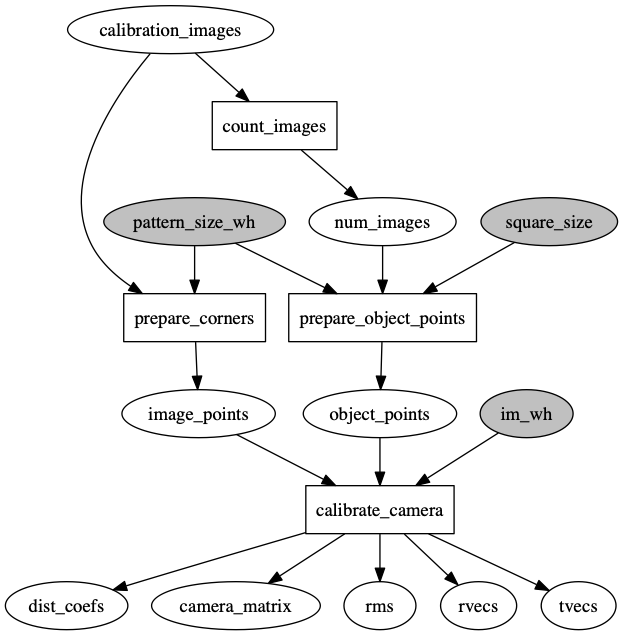

In [5]:
cg_calib = calibgraph.CGCalibrateCamera()

runner = compgraph.CompGraphRunner(cg_calib, frozen_tokens={
    'im_wh': cbcalib.get_im_wh(images[0]),
    'pattern_size_wh': psize,
    'square_size': sq_size
    
})

nxpd.draw(runner.token_manager.to_networkx())

In [6]:
import networkx as nx
nx.__version__

'2.2'

In [7]:
runner.run(calibration_images=images)

In [8]:
runner.token_value('camera_matrix')

array([[532.79536562,   0.        , 342.45825163],
       [  0.        , 532.91928338, 233.90060514],
       [  0.        ,   0.        ,   1.        ]])

In [9]:
runner.token_value('dist_coefs')

array([[-2.81086258e-01,  2.72581010e-02,  1.21665908e-03,
        -1.34204274e-04,  1.58514023e-01]])

In [10]:
print('Number of calibration images opened: ', len(runner.token_value('calibration_images')))
print('Number of images with good corners', len(runner.token_value('image_points')))

Number of calibration images opened:  13
Number of images with good corners 13


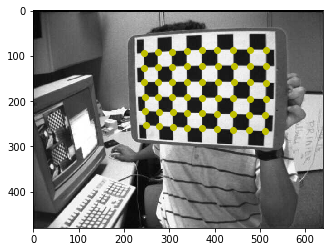

In [11]:
plt.figure()

plt.gray()
plt.imshow(runner['calibration_images'][0])
_ = plt.plot(runner['image_points'][0][:, 0], runner['image_points'][0][:, 1], 'yo')

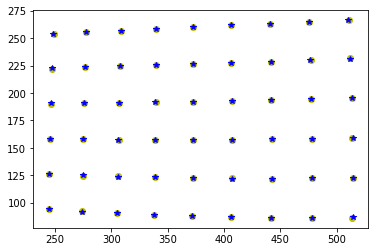

In [12]:
projected = cbcalib.project_points(
    runner['object_points'][0],
    runner['rvecs'][0],
    runner['tvecs'][0],
    runner['camera_matrix'],
    runner['dist_coefs'],
)

_ = plt.plot(runner['image_points'][0][:, 0], runner['image_points'][0][:, 1], 'yo')
_ = plt.plot(projected[:, 0], projected[:, 1], 'b*')